In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
from PIL import Image

Mounted at /content/drive


Iteration    0: Cost 3336691.44
Iteration 100000: Cost 42523.08
Iteration 200000: Cost 42447.22
Iteration 300000: Cost 42382.84
Iteration 400000: Cost 42325.07
Iteration 500000: Cost 42273.11
Iteration 600000: Cost 42226.37
Iteration 700000: Cost 42184.32
Iteration 800000: Cost 42146.48
Iteration 900000: Cost 42112.43
Total Error: 84163.58744165838


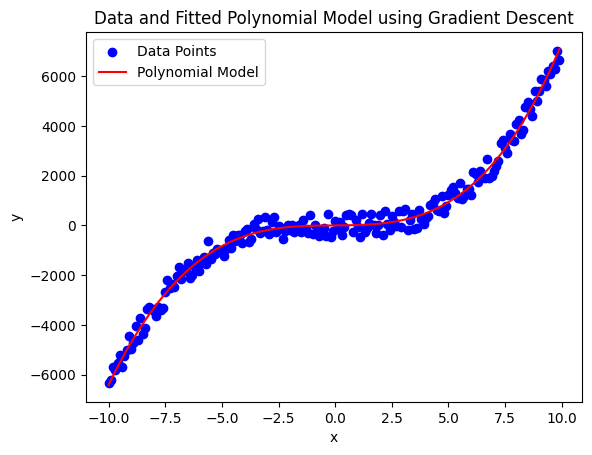

In [5]:
# These are the functions constructed in HW1. Will be using these
# to fit our polynomial model to the data as well.

def cost_function(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

def gradient_function(X, y, w, b):
    m = len(y)
    predictions = np.dot(X, w) + b
    dj_dw = (1 / m) * np.dot(X.T, (predictions - y))
    dj_db = (1 / m) * np.sum(predictions - y)
    return dj_db, dj_dw

def gradient_descent_vectorized(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = np.copy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        J_history.append(cost_function(X, y, w, b))

        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

# Read the CSV file using the pandas read function and saving data in 2 arrays
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML A2/data_HW1_Q2.csv')
x = data['x'].values
y = data['y'].values

# Feature Engineering using a quartic model (.T is for transpose in the code)
X = np.vstack([x**0, x**1, x**2, x**3, x**4]).T

# Gradient Descent Parameters
alpha = 0.0000001 # starting with alpha = 1e-7 after some optimization
iterations = 1000000

initial_w = np.zeros(X.shape[1]) # initializing weight vector
initial_b = 0

# Apply Gradient Descent
w_final, b_final, J_history = gradient_descent_vectorized(X, y, initial_w, initial_b, cost_function, gradient_function, alpha, iterations)

# Predict using the Model
y_pred = np.dot(X, w_final) + b_final

# Calculate Total Error
error = np.mean((y - y_pred)**2) # Using standard mean square error here
print(f"Total Error: {error}")

# Plotting the Data and Model
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Polynomial Model')
plt.title('Data and Fitted Polynomial Model using Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Total error and plot of the data and the model has been displayed below.
# We can see that the cost is converging as well as we run more iterations.